## Rod Cutting Problem

In [1]:
from collections import defaultdict

In [2]:
prices = defaultdict(lambda : -float('inf'))

In [3]:
for i, v in enumerate([1, 5, 8, 9, 10, 17, 17, 20, 24, 30]):
    prices[i+1] = v

In [4]:
from functools import wraps

In [5]:
def memo(func):
    cache = {}
    @wraps(func)
    def __wrap(*args, **kwargs):
        str_key = str(args) + str(kwargs)
        if str_key not in cache:
            result = func(*args, **kwargs)
            cache[str_key] = result
        return cache[str_key]
    return __wrap

In [6]:
solution = {}
@memo
def revenue(r):
    split, r_star = max([(0, prices[r])] + [(i, revenue(i) + revenue(r-i)) for i in range(1, r)], key=lambda x: x[1])
    solution[r] = (split, r-split)
    return r_star

In [7]:
revenue(100)

300

In [8]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [9]:
def parse_solution(r, revenue_solution):
    left, right = revenue_solution[r]
    if left == 0: return [right]
    return [left] + parse_solution(right, revenue_solution)

In [10]:
parse_solution(57, solution)

[1, 6, 10, 10, 10, 10, 10]

## Edit Distance

In [18]:
@memo
def get_edit_distance(str1, str2):
    if len(str1) == 0: return len(str2)
    if len(str2) == 0: return len(str1)
    return min(
       [get_edit_distance(str1[:-1], str2) + 1,
        get_edit_distance(str1, str2[:-1]) + 1,
        get_edit_distance(str1[:-1], str2[:-1]) + (0 if str1[-1] == str2[-1] else 2)]
    )

In [21]:
get_edit_distance('biejing', 'beijing')

2

In [22]:
get_edit_distance('biejing', 'beijie')

5

In [23]:
get_edit_distance('biejing', 'beijin')

3

## Optional

In [24]:
import random

In [25]:
import matplotlib.pylab as plt

In [26]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

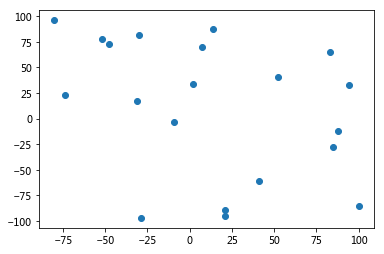

In [27]:
plt.scatter(latitudes, longitudes)

In [28]:
car_number = 3